In [40]:
import pandas as pd
import numpy as np
from classifier import classifier
from svmMLiA import smoPK, calcWs

class svm_basic(classifier):
    def __init__(self, C, toler, maxIter):
        self.maxIter = maxIter
        self.C = C
        self.toler = toler
        self.alphas = None
        self.weights = None
        self.b = 0
        
    def fit(self, dataArr, LabelArr):
        self.b, self.alphas = smoPK(dataArr,LabelArr,self.C, self.toler, self.maxIter)
        self.weights = calcWs(self.alphas, dataArr,LabelArr)
        
    def predict(self, dataArr, labelArr): #dataArr = test_x, labelArr = train_y
        datMat=np.mat(dataArr); 
        labelMat = np.mat(labelArr).transpose() #Y
        svInd=np.nonzero(self.alphas.A>0)[0]
        print(svInd)
        sVs=datMat[svInd] #get matrix of only support vectors
        labelSV = labelMat[svInd];
        print("there are %d Support Vectors" % sVs.shape[0])
        m,n = datMat.shape
        for i in range(m):
            NK = sVs*datMat[i,:].T #non-kernel version
            predict = NK.T * np.multiply(labelSV,self.alphas[svInd]) + self.b

fullSet, iter: 0 i:0, pairs changed 1
fullSet, iter: 0 i:1, pairs changed 1
fullSet, iter: 0 i:2, pairs changed 1
fullSet, iter: 0 i:3, pairs changed 1
fullSet, iter: 0 i:4, pairs changed 2
fullSet, iter: 0 i:5, pairs changed 3
fullSet, iter: 0 i:6, pairs changed 3
fullSet, iter: 0 i:7, pairs changed 4
fullSet, iter: 0 i:8, pairs changed 5
fullSet, iter: 0 i:9, pairs changed 5
j not moving enough
fullSet, iter: 0 i:10, pairs changed 5
fullSet, iter: 0 i:11, pairs changed 6
j not moving enough
fullSet, iter: 0 i:12, pairs changed 6
j not moving enough
fullSet, iter: 0 i:13, pairs changed 6
fullSet, iter: 0 i:14, pairs changed 6
fullSet, iter: 0 i:15, pairs changed 6
fullSet, iter: 0 i:16, pairs changed 7
fullSet, iter: 0 i:17, pairs changed 7
fullSet, iter: 0 i:18, pairs changed 8
fullSet, iter: 0 i:19, pairs changed 8
fullSet, iter: 0 i:20, pairs changed 8
fullSet, iter: 0 i:21, pairs changed 8
fullSet, iter: 0 i:22, pairs changed 8
fullSet, iter: 0 i:23, pairs changed 8
fullSet, iter:

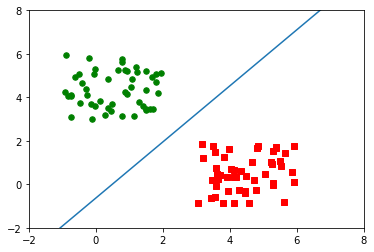

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from svm_basic import svm_basic

data = pd.read_csv('linearly_separable.csv',delimiter=",",header=None)
Xin = data.iloc[:,:2]
Yin = data.iloc[:,2]
dataArr = Xin.values.tolist()
labelArr = Yin.values.tolist()
splitpoint = int(len(labelArr)*0.5)
train_x = dataArr[:splitpoint]
train_y = labelArr[:splitpoint]
test_x = dataArr[splitpoint:]
test_y = labelArr[splitpoint:]

svm = svm_basic(1, 0.001, 50)
svm.fit(train_x,train_y)

w0 = svm.weights.item(0)
w1 = svm.weights.item(1)
b = svm.b.item(0)

print("parameters: ")
print(w0,w1,b)

svm.predict(train_x,train_y)
svm.predict(test_x,train_y)

n = Xin.shape[0]
xcord1 = []
ycord1 = []
xcord2 = []
ycord2 = []
for i in range(n):
    if int(Yin.iloc[i]) == 1:
        xcord1.append(Xin.iloc[i][0])
        ycord1.append(Xin.iloc[i][1])
    else:
        xcord2.append(Xin.iloc[i][0])
        ycord2.append(Xin.iloc[i][1])
fig = plt.figure()
    
#Plot the data as points with different colours
ax = fig.add_subplot(111)
ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
ax.scatter(xcord2, ycord2, s=30, c='green')

# Plot the best-fit line
x = np.arange(-2.0, 12.0, 0.1)
y = (-w0*x - b)/w1
ax.plot(x,y)
ax.axis([-2,8,-2,8])
plt.show()
plt.close()